<center><h1><strong>tau-data Indonesia</strong></h1></center>
<center><h2><strong><font color="blue">Exploratory Data Analysis-02-B: Time Series Data Visualizations</font></strong></h2></center>
<img alt="" src="images/Cover.jpg"/>

<b><center>(C) Taufik Sutanto</center>
<center><h3><font color="blue">https://tau-data.id/eda-02b/ ~ taufik@tau-data.id </font></h3></center>

In [13]:
# Rubah Teks ke DateTime Format 
from datetime import datetime
# %a %b %d %l %m %M %z %Y https://www.foragoodstrftime.com/
d1 = datetime.strptime('Apr 28 2021  1:33PM', '%b %d %Y %I:%M%p')
d2 = datetime.strptime('Jun 1 2004  1:33PM', '%b %d %Y %I:%M%p')
d1

datetime.datetime(2021, 4, 28, 13, 33)

In [4]:
print(dir(d1))

['__add__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', 'astimezone', 'combine', 'ctime', 'date', 'day', 'dst', 'fold', 'fromisocalendar', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'now', 'replace', 'resolution', 'second', 'strftime', 'strptime', 'time', 'timestamp', 'timetuple', 'timetz', 'today', 'toordinal', 'tzinfo', 'tzname', 'utcfromtimestamp', 'utcnow', 'utcoffset', 'utctimetuple', 'weekday', 'year']


In [12]:
# weekday 0=Senin, 1=Selasa, 2=Rabu, ... dst
d1.minute, d1.hour, d1.weekday(), d1.day, d1.month, d1.year

(33, 13, 2, 28, 4, 2021)

In [118]:
hari_ = {0:"Senin", 1:"Selasa", 2:"Rabu", 3:"Kamis", 4:"Jumat", 5:"Sabtu", 6:"Minggu"}
hari_[d1.weekday()]

'Rabu'

In [119]:
# Cara lain (Menggunakan module tambahan)
import calendar

calendar.day_name[d1.weekday()]

'Wednesday'

# Hari/Saat ini?

In [121]:
datetime.today().strftime('%Y-%m-%d ~ %H:%M:%S')

'2021-04-28 ~ 10:14:51'

# Operasi pada variabel datetime

In [20]:
# Mana yang lebih dahulu
d1 = datetime.strptime('Apr 28 2021  1:33PM', '%b %d %Y %I:%M%p')
d2 = datetime.strptime('Apr 27 2021  1:33PM', '%b %d %Y %I:%M%p')

d1<d2, d1>d2, d1==d2, d1<=d2

(False, True, False, False)

In [28]:
# Menjumlahkan waktu: Contoh kasus Google Map/Ojol
import datetime as dm # ==> hati-hati disini!!!...

d3 = d1 + dm.timedelta( days=1, seconds=10, microseconds=88, milliseconds=100, minutes=33, hours=8, weeks=9 ) # days, seconds, then other fields.
print(d1)
print(d3)

2021-04-28 13:33:00
2021-07-01 22:06:10.100088


# Konsekuensi dari DateTime ==> Sekarang kita bisa mengurutkan dengan benar

In [30]:
Waktu = [d3, d2, d1]
print(Waktu)
Waktu.sort() # Hati-hati ini "inplace"
print(Waktu)

[datetime.datetime(2021, 7, 1, 22, 6, 10, 100088), datetime.datetime(2021, 4, 27, 13, 33), datetime.datetime(2021, 4, 28, 13, 33)]
[datetime.datetime(2021, 4, 27, 13, 33), datetime.datetime(2021, 4, 28, 13, 33), datetime.datetime(2021, 7, 1, 22, 6, 10, 100088)]


# Datetime di Pandas

## References:

* https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01
* https://machinelearningmastery.com/time-series-data-visualization-with-python/
* https://datascienceanywhere.medium.com/visualizing-time-series-data-in-python-e49fa5d10ea
* Dataset: https://github.com/rashida048/Datasets/blob/master/stock_data.csv

In [42]:
import pandas as pd

fileData = 'data/stock_data.csv'
df = pd.read_csv(fileData, error_bad_lines=False, low_memory = False)
print(df.shape)
df.head()

(3019, 7)


,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [46]:
# Penting untuk cek Tipe Data Dataframe
# Perhatikan disini tipe data "Date" masih berupa string!!!....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3019 non-null   object 
 1   Open      3019 non-null   float64
 2   High      3019 non-null   float64
 3   Low       3019 non-null   float64
 4   Close     3019 non-null   float64
 5   Volume    3019 non-null   int64  
 6   Name      3019 non-null   object 
 7   weekdays  3019 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 188.8+ KB


In [122]:
# Perhatikan sekarang "Date" tidak lagi berupa variable, tapi merupakan index bagi dataframenya
df = pd.read_csv(fileData, parse_dates=True, index_col = "Date", error_bad_lines=False, low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [123]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [95]:
# Karena kita gunakan waktu sebagai index, maka kita bisa mudah dalam melakukan "slice" ke data

df.loc['2009'].head()

,Open,High,Low,Close,Volume,Name,weekdays,Month
Date,,,,,,,,
2009-01-02,12.17,12.85,12.12,12.85,10213787,AABA,Jumat,1
2009-01-05,12.72,13.01,12.39,12.86,12029058,AABA,Senin,1
2009-01-06,12.96,13.24,12.88,13.00,10173926,AABA,Selasa,1
2009-01-07,12.71,13.16,12.45,12.71,25302285,AABA,Rabu,1
2009-01-08,12.37,13.07,12.31,13.07,14348008,AABA,Kamis,1


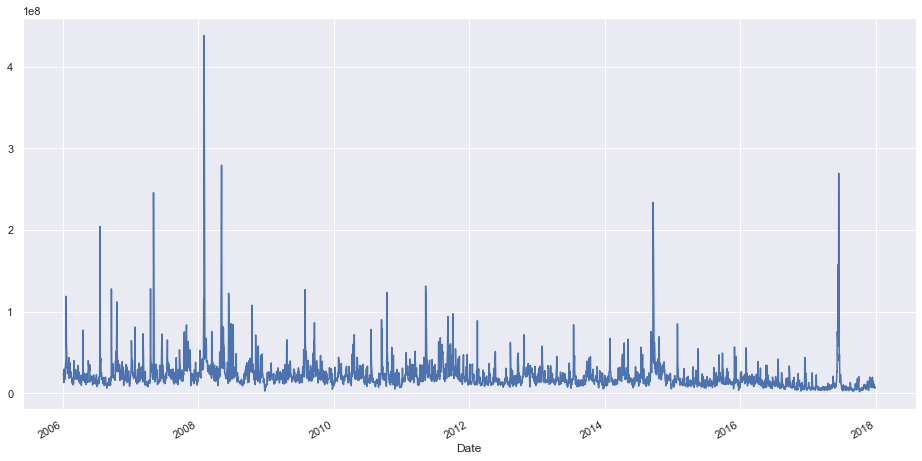

In [51]:
# Basic Line Plot
p = df['Volume'].plot(figsize=(16,8))
# Perhatikan "makna" df['volume']

# SeaBorn

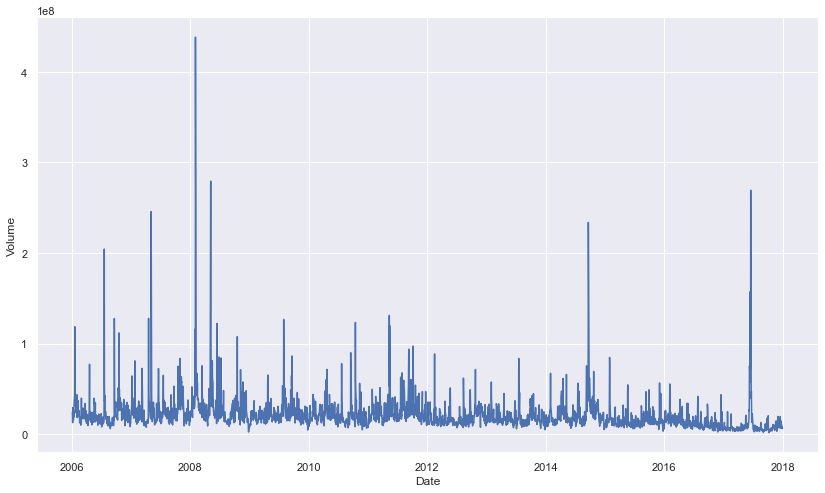

In [53]:
# Warning Slower .... 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

plt.figure(figsize=(14, 8))
p = sns.lineplot(x='Date', y='Volume', data=df)
plt.show()

# Hue : Let's add days

In [124]:
# Bisa menggunakan Fungsi "Map": silahkan dicoba sebagai latihan

df['weekdays'] = ['']*df.shape[0]
for i,d in df.iterrows():
    df.loc[i,'weekdays'] =  hari_[i.weekday()] # Perhatikan disini menggunakan i dan bukan d.Date karena waktu=index
    
df.head()

,Open,High,Low,Close,Volume,Name,weekdays
Date,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin


In [125]:
d

Open          69.79
High          70.13
Low           69.43
Close         69.85
Volume      6613070
Name           AABA
weekdays           
Name: 2017-12-29 00:00:00, dtype: object

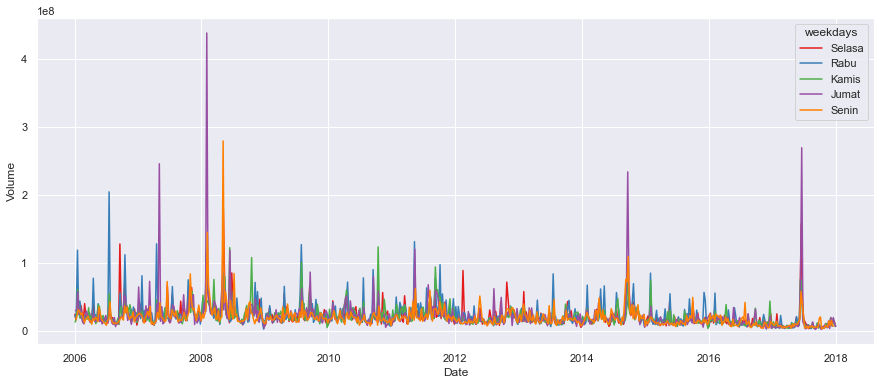

In [62]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Volume', data=df, hue='weekdays', palette='Set1')
plt.show()
# We have our first insight!!!...

# SubPlot

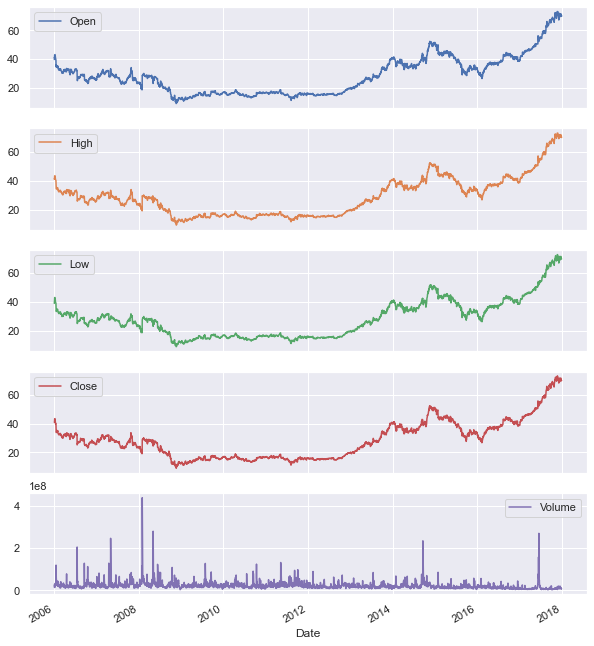

In [127]:
p = df.plot(subplots=True, figsize=(10,12))

# Seasonality

* Resampling berdasarkan bulan (month)
* Filter tahun >2016

In [128]:
# Reduce
df_month = df.resample("M").mean() # dirata-ratakan perbulan. hati-hati hanya bisa jika "waktu" adalah index
df_month.head()
# Perhatikan Date mulai 2006

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-31,38.245500,38.694000,37.641500,38.113000,3.400594e+07
2006-02-28,33.141579,33.436842,32.627368,32.975789,2.329848e+07
2006-03-31,31.333478,31.696957,30.929130,31.218696,2.095522e+07
2006-04-30,32.383684,32.790000,31.914737,32.283158,2.200768e+07
2006-05-31,31.744545,32.175455,31.171364,31.517273,2.218047e+07


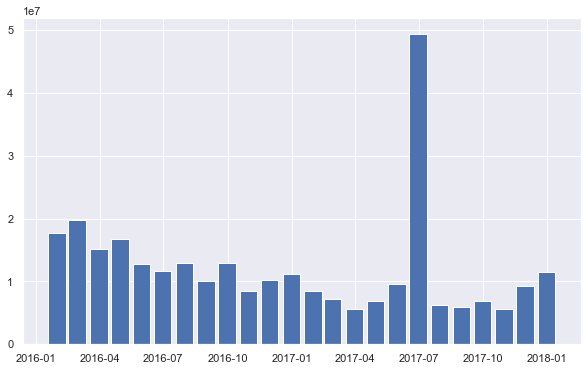

In [129]:
import matplotlib.dates as mdates # Need this additional function

fig, ax = plt.subplots(figsize=(10, 6))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Supaya label lebih jelas
ax.bar(df_month['2016':].index, df_month.loc['2016':, "Volume"], width=25, align='center')

plt.show()

# Seaborn & Seasonality

* Butuh Kolom baru "Month"

In [74]:
# Latihan: ganti dengan "map" function
df['Month'] = ['']*df.shape[0]
for i,d in df.iterrows():
    df.loc[i,'Month'] =  i.month # Perhatikan disini menggunakan i dan bukan d.Date karena waktu=index
    
df.head()

,Open,High,Low,Close,Volume,Name,weekdays,Month
Date,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa,1
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu,1
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis,1
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat,1
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin,1


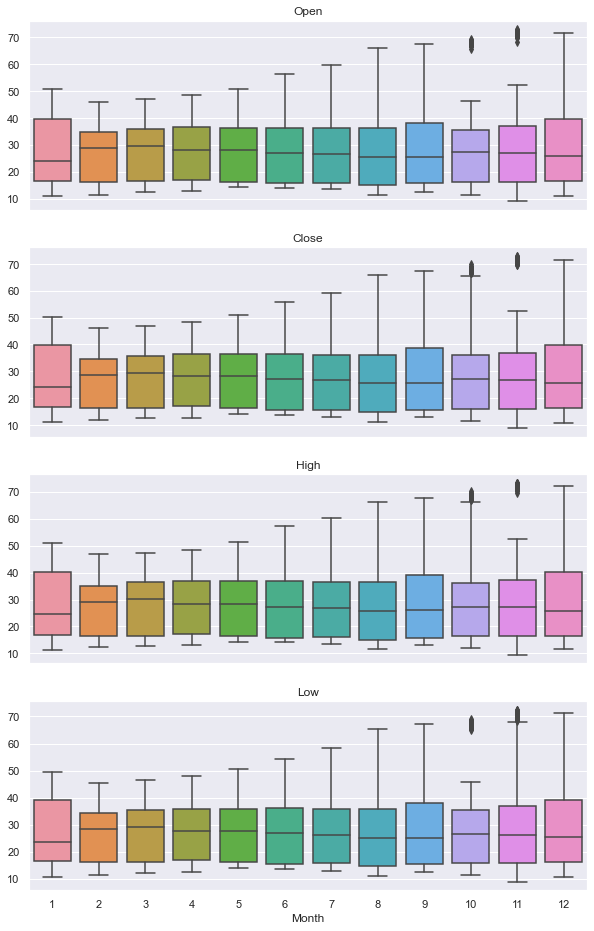

In [75]:
#start, end = '2016-01', '2016-12'
fig, axes = plt.subplots(4, 1, figsize=(10, 16), sharex=True)

for name, ax in zip(['Open', 'Close', 'High', 'Low'], axes):
    sns.boxplot(data = df, x='Month', y=name, ax=ax)
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

# Line Plot Revisited with resampling

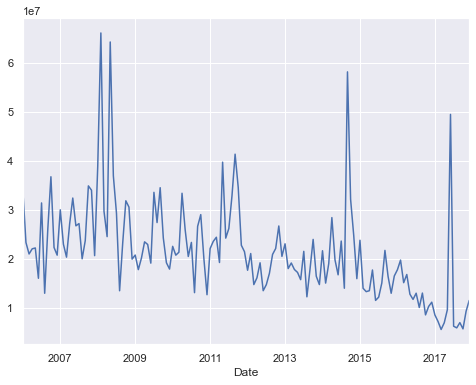

In [76]:
p = df_month['Volume'].plot(figsize=(8, 6))

# Resampling bisa juga berdasarkan minggu (dan contrasted with daily)

* Perhatikan Business understanding dengan baik.

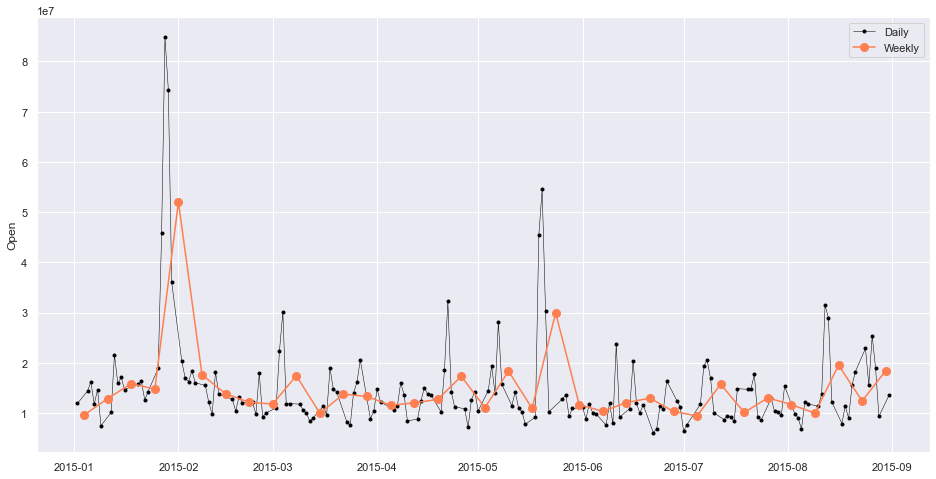

In [79]:
df_week = df.resample("W").mean()
start, end = '2015-01', '2015-08'

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')

ax.set_ylabel("Open")
ax.legend()
plt.show()

In [130]:
# Contoh sederhana
import numpy as np

df2 = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
print(df2)
df2.rolling(2, win_type='triang').sum()

     B
0  0.0
1  1.0
2  2.0
3  NaN
4  4.0


,B
0,NaN
1,0.5
2,1.5
3,NaN
4,NaN


In [131]:
df_7d_rolling = df.rolling(window=7, center=False).mean() # Perhatikan centre = true !!!... 

df_7d_rolling.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN,NaN
2006-01-09,NaN,NaN,NaN,NaN,NaN
2006-01-10,NaN,NaN,NaN,NaN,NaN
2006-01-11,41.852857,42.532857,41.441429,42.127143,2.082691e+07
2006-01-12,42.171429,42.642857,41.722857,42.124286,2.006818e+07
2006-01-13,42.140000,42.525714,41.558571,41.971429,2.155571e+07


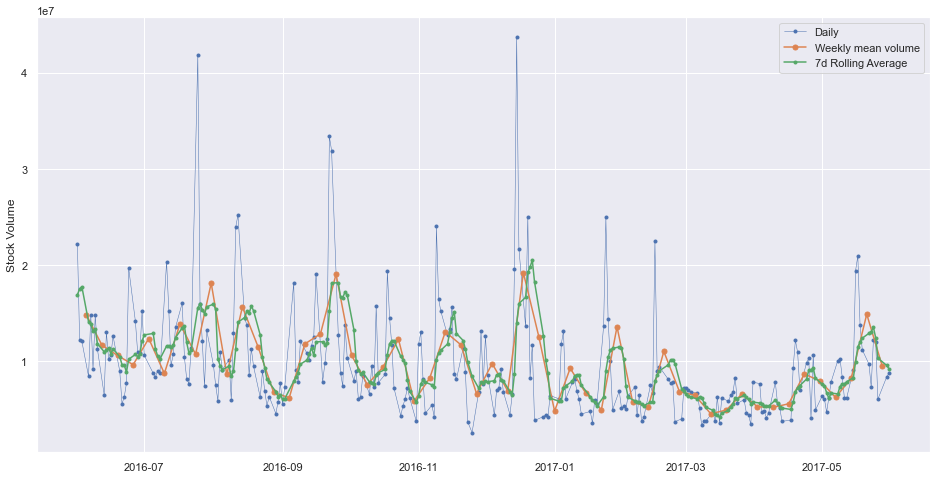

In [132]:
start, end = '2016-06', '2017-05'
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=5, 
        linestyle='-', label = 'Weekly mean volume')
ax.plot(df_7d_rolling.loc[start:end, 'Volume'], marker='.', linestyle='-', label='7d Rolling Average')

ax.set_ylabel('Stock Volume')
ax.legend()
plt.show()

# Memvisualisasikan Perubahan (Rasio dengan 1 hari sebelumnya)

* Menggunakan fungsi "Shift": The shift function shifts the data before or after the specified amount of time.
* https://pandas.pydata.org/docs/reference/api/pandas.Series.shift.html
* Fungsi Div (membagi), dalam hal ini dengan shift.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html
* https://www.geeksforgeeks.org/python-pandas-dataframe-shift/

In [133]:
df.head()

,Open,High,Low,Close,Volume,Name,weekdays
Date,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin


In [134]:
df.Close.shift().head()

Date
2006-01-03      NaN
2006-01-04    40.91
2006-01-05    40.97
2006-01-06    41.53
2006-01-09    43.21
Name: Close, dtype: float64

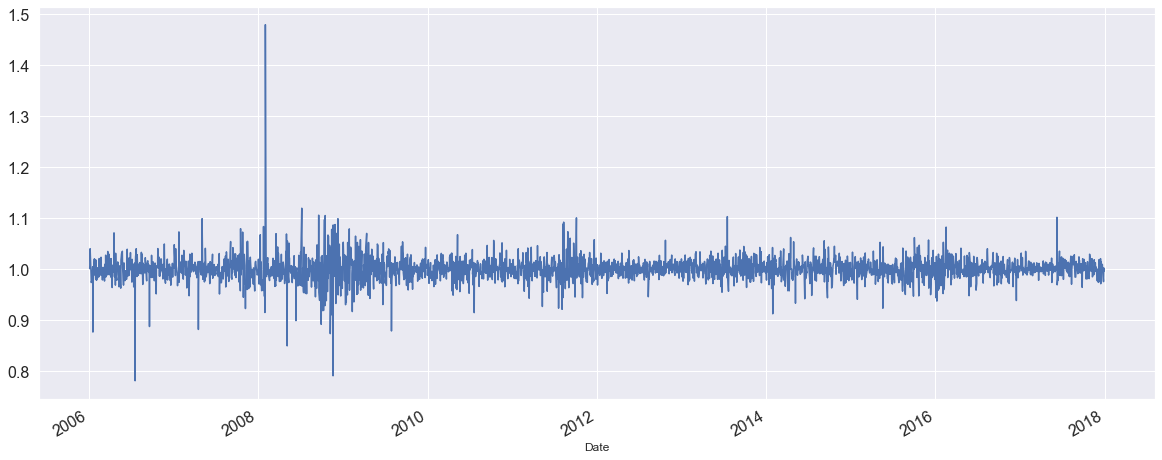

In [135]:
df['Change'] = df.Close.div(df.Close.shift())
p = df['Change'].plot(figsize=(20, 8), fontsize = 16)

In [136]:
df.head()

,Open,High,Low,Close,Volume,Name,weekdays,Change
Date,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa,NaN
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu,1.001467
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis,1.013669
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat,1.040453
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin,1.004860


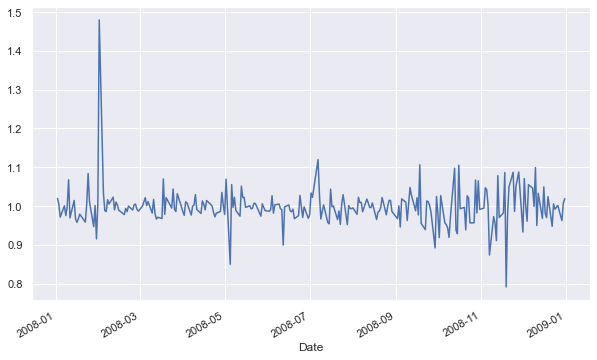

In [137]:
# Zoom to a year

p = df.loc['2008']['Change'].plot(figsize=(10, 6))

# Percent_Change

* Percentage change between the current and a prior element.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

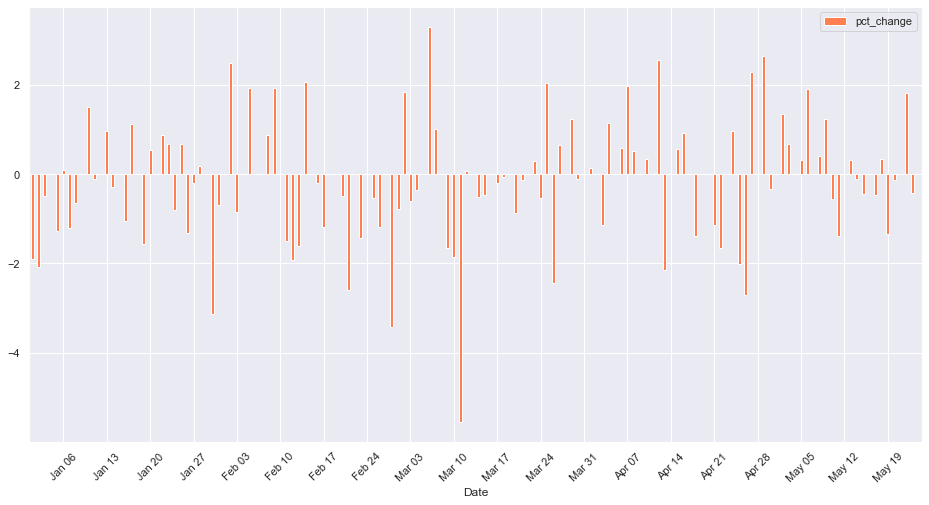

In [101]:
df_month.loc[:, 'pct_change'] = df.Close.pct_change()*100

fig, ax = plt.subplots(figsize=(16, 8))

df_month['pct_change' ].plot(kind='bar', color='coral', ax=ax)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
ax.legend()

plt.show()

# Differencing (Sangat penting di Statistika/Data science)

* First discrete difference of element.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

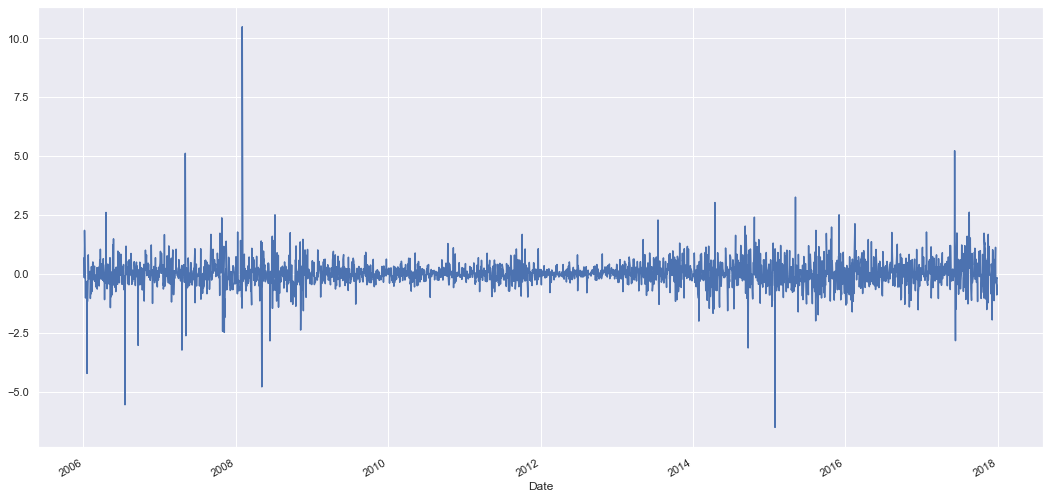

In [140]:
p = df.High.diff().plot(figsize=(18, 9))

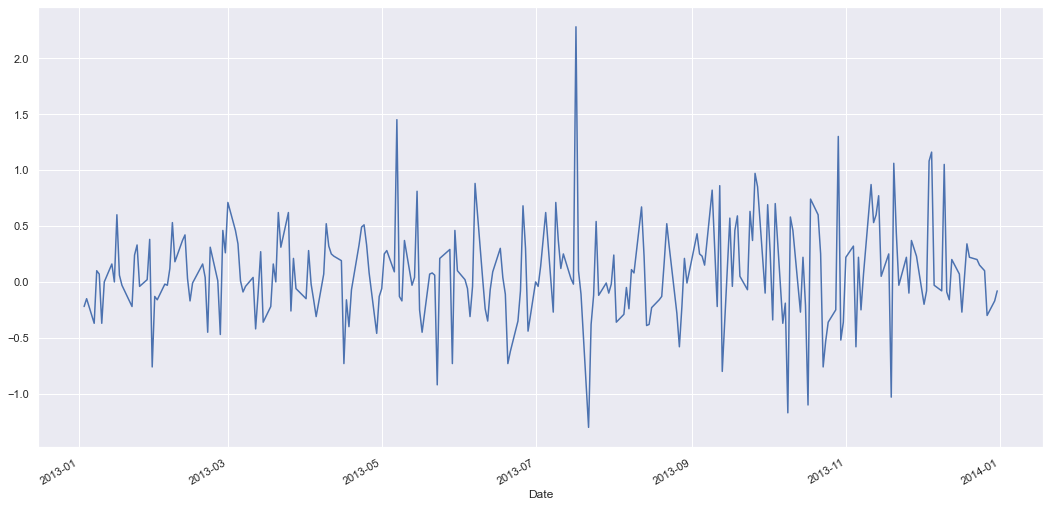

In [104]:
# Zoom
p = df.loc['2013'].High.diff().plot(figsize=(18, 9))

# Expanding Window: Akumulasi Data

* Bayangkan seperti jumlah total kasus Covid, tapi lebih fleksible karena bisa juga menggunakan rata-rata atau simpangan baku.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html

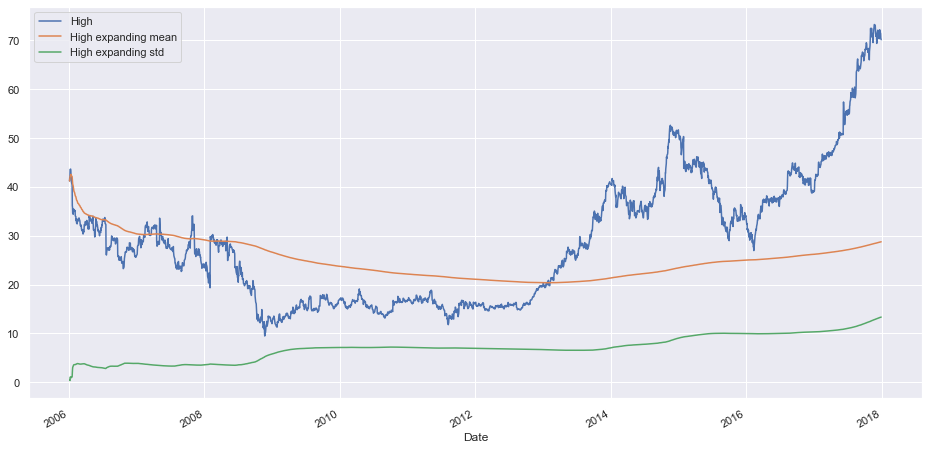

In [106]:
fig, ax = plt.subplots(figsize=(16, 8))

ax = df.High.plot(label='High')
ax = df.High.expanding().mean().plot(label='High expanding mean')
ax = df.High.expanding().std().plot(label='High expanding std')

ax.legend(); plt.show()

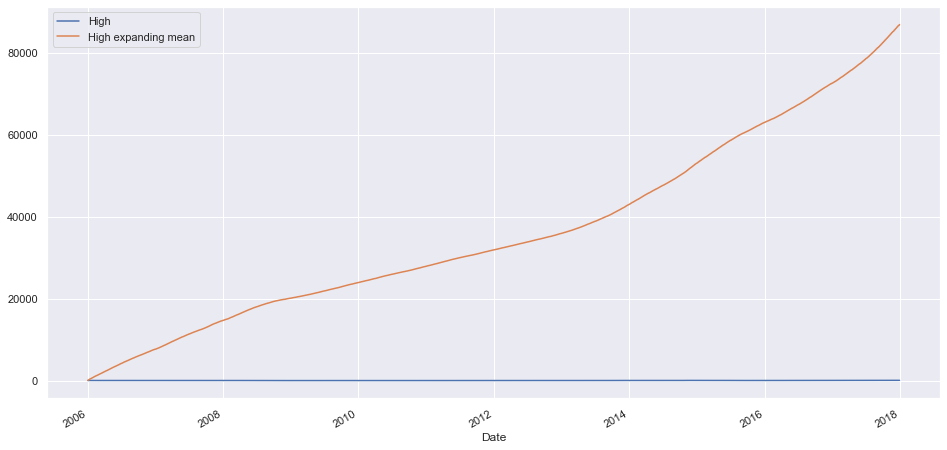

In [108]:
fig, ax = plt.subplots(figsize=(16, 8))

ax = df.High.plot(label='High')
ax = df.High.expanding().sum().plot(label='High expanding mean')
ax.legend(); plt.show()

# Hati-hati skala data ... Latihan: what to do?

# Heat Map

* Jauh lebih mudah untuk mendapatkan insight
* Butuh untuk menyesuaikan "Struktur Data"-nya.
* Butuh tambahan kolom "Year
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
* https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [112]:
# Latihan: ganti dengan "map" function
df['Year'] = ['']*df.shape[0]
for i,d in df.iterrows():
    df.loc[i,'Year'] =  i.year # Perhatikan disini menggunakan i dan bukan d.Date karena waktu=index
    
df.head()

,Open,High,Low,Close,Volume,Name,weekdays,Month,Change,Year
Date,,,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa,1,NaN,2006
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu,1,1.001467,2006
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis,1,1.013669,2006
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat,1,1.040453,2006
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin,1,1.004860,2006


In [113]:
all_month_year_df = pd.pivot_table(df, values="Open",
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]] # name months
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df.head()

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
Jan,38.245500,27.990500,21.926667,12.084500,16.572105,16.441000,15.719500,19.866667,39.268571,48.310500,30.250526,42.256000,27.439336
Feb,33.141579,30.297368,28.884000,12.601053,15.252632,16.778421,15.445500,20.623684,37.397895,43.861579,29.107000,44.916316,27.321515
Mar,31.333478,30.549545,28.070000,13.255455,16.256087,16.663043,14.986818,22.673000,37.975238,43.929091,34.064545,46.230870,27.995209
Apr,32.383684,30.021000,27.930000,13.802381,17.462500,16.853500,15.231500,23.988636,35.254762,44.590476,36.873810,47.207895,28.401504
May,31.744545,29.288182,26.731905,14.903000,15.965000,17.020476,15.405000,26.160455,34.852857,43.475500,36.822381,49.645909,28.583543


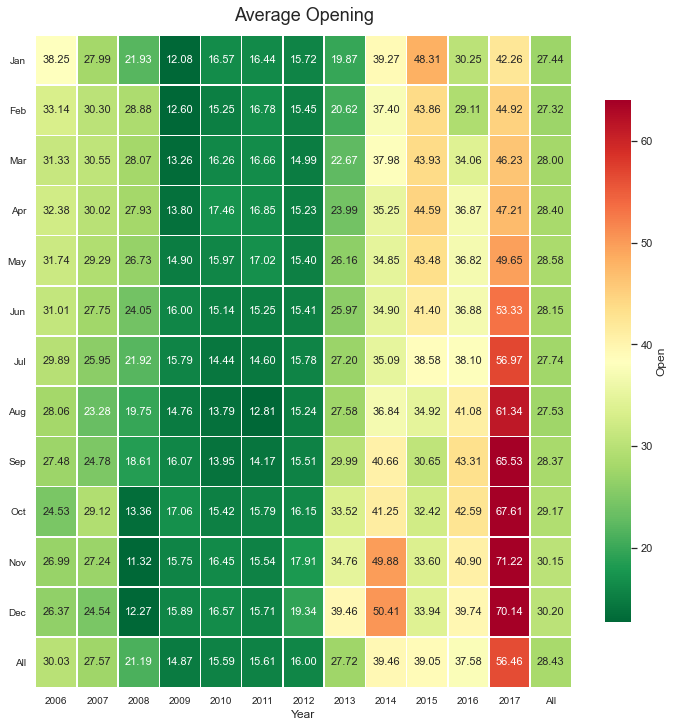

In [117]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(all_month_year_df, cmap='RdYlGn_r', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Open'}, ax=ax)                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Average Opening', fontdict={'fontsize':18},    pad=14);

plt.show()

# End of Module
<hr>
